In [1]:
# import packages

# Basics
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Graphs
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Preprocessing; model selection and evaluation
from sklearn import pipeline, preprocessing
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# text handling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm

# for custom countvectorizer with SpaCy lemmatization
import spacy
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, VectorizerMixin
from sklearn.base import TransformerMixin, BaseEstimator
from scipy.sparse import csr_matrix

# WordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

------
If we need to move virtual ENV to use Tensorflow we will need to install:

1. spacy

<code> conda install -c spacy spacy </code>

2. 'en_core_web_md'

<code> python -m spacy download en_core_web_md </code>

3. wordcloud

<code> conda install -c conda-forge wordcloud </code>

------

In [2]:
# import packages
data = pd.read_csv("saved_csv/df.csv")
data.drop(columns = "Unnamed: 0",inplace=True)

df = data.copy()

### Setting up data for analysis
------

In [3]:
# putting questions into categories

current_mh_coverage = ["Does your employer provide mental health benefits as part of healthcare coverage?",
               "Do you know the options for mental health care available under your employer-provided health coverage?",
               "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
               "Does your employer offer resources to learn more about mental health disorders and options for seeking help?",
               "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
               "If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?"]

previous_mh_coverage = ["Have your previous employers provided mental health benefits?",
                        "Were you aware of the options for mental health care provided by your previous employers?",
                        "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
                        "Did your previous employers provide resources to learn more about mental health disorders and how to seek help?",
                        "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?"]

mh_status = ["Do you currently have a mental health disorder?",
             "Have you ever been diagnosed with a mental health disorder?",'Anxiety Disorder', 'Mood Disorder', 
             'Psychotic Disorder','Eating Disorder', 'Neurodevelopmental Disorders','Personality Disorder', 
             'Obsessive-Compulsive Disorder','Post-Traumatic Stress Disorder', 'Dissociative Disorder',
             'Substance-Related and Addictive Disorders', 'Other','Adjustment disorder',
             "Have you had a mental health disorder in the past?",
             "Have you ever sought treatment for a mental health disorder from a mental health professional?",
             "Do you have a family history of mental illness?",
             "How willing would you be to share with friends and family that you have a mental illness?",
             "Would you be willing to bring up a physical health issue with a potential employer in an interview?"]

witnessed_exp = ["Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?",
                 "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
                 "Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?"]

ratings = df.columns[df.columns.str.contains("Overall")]

demographics = ["What is your age?","What is your gender?","What country do you live in?",
                "What US state or territory do you live in?","What is your race?"]

comfort_talking_current = ["Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?",
                           "Have you ever discussed your mental health with your employer?",
                           "Would you feel comfortable discussing a mental health issue with your coworkers?",
                           "Have you ever discussed your mental health with coworkers?",
                           "Have you ever had a coworker discuss their or another coworker's mental health with you?",
                           "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?",
                           "Would you bring up your mental health with a potential employer in an interview?",
                           "Are you openly identified at work as a person with a mental health issue?"]

comfort_talking_previous = ["Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?",
                            "Would you have been willing to discuss your mental health with your direct supervisor(s)?",
                            "Did you ever discuss your mental health with your previous employer?",
                            "Would you have been willing to discuss your mental health with your coworkers at previous employers?",
                            "Did you ever discuss your mental health with a previous coworker(s)?",
                            "Did you ever have a previous coworker discuss their or another coworker's mental health with you?",
                            "Would you bring up your mental health with a potential employer in an interview?",
                            "Are you openly identified at work as a person with a mental health issue?"]

comfort_dependent_var = ["Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?",
                           "Have you ever discussed your mental health with your employer?",
                           "Would you feel comfortable discussing a mental health issue with your coworkers?",
                           "Have you ever discussed your mental health with coworkers?",
                           "Have you ever had a coworker discuss their or another coworker's mental health with you?",
                           "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?",
                           "Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?",
                           "Would you have been willing to discuss your mental health with your direct supervisor(s)?",
                           "Did you ever discuss your mental health with your previous employer?",
                           "Would you have been willing to discuss your mental health with your coworkers at previous employers?",
                           "Did you ever discuss your mental health with a previous coworker(s)?",
                           "Did you ever have a previous coworker discuss their or another coworker's mental health with you?",
                           "Would you bring up your mental health with a potential employer in an interview?",
                           "Are you openly identified at work as a person with a mental health issue?"]

categories = [current_mh_coverage,previous_mh_coverage,mh_status,witnessed_exp,ratings,comfort_talking_current,comfort_talking_previous,comfort_dependent_var]

### Preparing the data
------

#### Independent Variables for Q1
------

In [4]:
def make_dummies(question,columns_to_keep = 1):
    
    dummies = pd.get_dummies(df_2.loc[:,question])
    for j in range(len(dummies.columns)):
        name = question + "__" + dummies.columns[j]
        dummies.rename(columns = {dummies.columns[j] : name},inplace=True)

    result = dummies.iloc[:,[columns_to_keep]]
    
    return result

In [5]:
# making a copy
df_2 = df.copy()

In [6]:
# preparing a table of independent variables for Q1
independent_var = [current_mh_coverage,previous_mh_coverage,witnessed_exp,mh_status,ratings]
dependent_var = [comfort_talking_current,comfort_talking_previous]

In [7]:
# set up 2 dataframes for concatenating data
omitted = pd.DataFrame(columns = ["Question","Answer"])
final = pd.DataFrame()

In [8]:
# current_mh_coverage
for i in [0,2,3]:
    result = make_dummies(current_mh_coverage[i],-1)
    final = pd.concat([final,result],axis = 1)

for i in [2,-2,-1]:
    result = make_dummies(current_mh_coverage[5],i)
    final = pd.concat([final,result],axis = 1)

In [9]:
# witnessed_exp
result = make_dummies(witnessed_exp[0],-1)
final = pd.concat([final,result],axis = 1)

In [10]:
# mh_status
old_answer_1 = "Possibly"
old_answer_2 = "-1"
answer = "Don't Know"

to_dummy = []
for i in [0,1,-5,-3,-1]:
    to_dummy.append(mh_status[i])
    
df_2.loc[:,to_dummy[0]][df_2.loc[:,to_dummy[0]]==old_answer_1]=answer

df_2.loc[:,to_dummy[2]][df_2.loc[:,to_dummy[2]]==old_answer_1]=answer
df_2.loc[:,to_dummy[2]][df_2.loc[:,to_dummy[2]]==old_answer_2]=answer

In [11]:
# mh_status
result = make_dummies(to_dummy[0],-1)
final = pd.concat([final,result],axis = 1)

for i in [2,3,4,5,6,7,8,9,10,11,12,13,15,17]:
    final = pd.concat([final,df_2.loc[:,mh_status[i]]],axis = 1)

In [12]:
# ratings
for i in [1,4]:
    final = pd.concat([final,df_2.loc[:,ratings[i]]],axis = 1)

In [13]:
independent_q1 = final

#### Dependent Variables for Q1
------

In [15]:
# creating a table of dependent variables
dependent = df.loc[:,comfort_dependent_var]

In [16]:
num_list = [0,2,5,6,7,9,12]
columns_to_join = [1,3,4,8,10,11,13]

final_dep = pd.get_dummies(dependent.iloc[:,num_list])

for i in columns_to_join:
    result = pd.get_dummies(dependent.iloc[:,i])
    final_dep = pd.concat([final_dep,result],axis=1)

#### Predicting classes
------

Models Used:

- KMeans Clustering

In [ ]:
# KMeans Clustering
X_alt = final_dep

inertia = []

for num in range(1,21):
    k_means_model = KMeans(n_clusters = num)
    k_means_model.fit(X_alt)

    y_pred2_alt = k_means_model.predict(X_alt)
    inertia.append(k_means_model.inertia_)

# b_alt = pd.DataFrame(y_pred2_alt)
# b_alt[0].groupby(b_alt[0]).count()

In [ ]:
plt.scatter(np.arange(1,21),inertia);

In [ ]:
k_means_model = KMeans(n_clusters = 4)
k_means_model.fit(X_alt)

y_pred2_alt = k_means_model.predict(X_alt)

b_alt = pd.DataFrame(y_pred2_alt)
b_alt[0].groupby(b_alt[0]).count()

In [ ]:
b_alt.rename(columns = {0 : "Classes"},inplace=True)

In [ ]:
#b_alt.to_csv("saved_csv/q1_dependent_alt.csv")

Since there is a factor of randomness in KMeans Clustering, the code will generate different counts with each iteration. Since the goal is to generate a cluster of 4 classes with an approximately normal distribution, the following cluster count will be used for the analysis:

|Class|Count|
|------|------|
|0|143|
|1|490|
|2|386|
|3|154|

### Q1 Qualitative insights for the tech industry to improve MH support for employees
------

In [17]:
# grabbing the dependent variables
dependent_class = pd.read_csv("saved_csv/q1_dependent_alt.csv")
dependent_class.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
# simplifing dependent variables to 0/1
dependent_class_alt = dependent_class.copy()

dependent_class_alt[dependent_class_alt < 2] = 0
dependent_class_alt[dependent_class_alt >= 2] = 1

In [19]:
# Code source: https://github.com/mpavlovic/spacy-vectorizers
# create a custom countvectorizer with SpaCy lemmatization

class SpacyPipeInitializer(object):
    def __init__(self, nlp, join_str=" ", batch_size=10000, n_threads=2):
        self.nlp = nlp
        self.join_str = join_str
        self.batch_size = batch_size
        self.n_threads = n_threads
        
class SpacyPipeProcessor(SpacyPipeInitializer):
    def __init__(self, nlp, multi_iters=False, join_str=" ", batch_size=10000, n_threads=2):
        super(SpacyPipeProcessor, self).__init__(nlp, join_str, batch_size, n_threads)
        self.multi_iters = multi_iters
    
    def __call__(self, raw_documents):
        docs_generator = self.nlp.pipe(raw_documents, batch_size=self.batch_size, n_threads=self.n_threads)
        return docs_generator if self.multi_iters == False else list(docs_generator)
    
class SpacyLemmaCountVectorizer(CountVectorizer):
    
    def __init__(self, input='content', encoding='utf-8',
                 decode_error='strict', strip_accents=None,
                 lowercase=True, preprocessor=None, tokenizer=None,
                 stop_words=None, token_pattern=r"(?u)[^\r\n ]+",
                 ngram_range=(1, 1), analyzer='word',
                 max_df=1.0, min_df=1, max_features=None,
                 vocabulary=None, binary=False, dtype=np.int64, 
                 nlp=None, ignore_chars='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~', 
                 join_str=" ", use_pron=False):
        
        super().__init__(input, encoding, decode_error, strip_accents, 
                                                   lowercase, preprocessor, tokenizer,
                                                   stop_words, token_pattern, ngram_range, 
                                                   analyzer, max_df, min_df, max_features,
                                                   vocabulary, binary, dtype)
        self.ignore_chars = ignore_chars
        self.join_str = ' ' # lemmas have to be joined for splitting
        self.use_pron = use_pron
        self.translate_table = dict((ord(char), None) for char in self.ignore_chars)
        
    def lemmatize_from_docs(self, docs):
        for doc in docs:
            lemmas_gen = (token.lemma_.translate(self.translate_table) if self.use_pron or token.lemma_!='-PRON-' else token.lower_.translate(self.translate_table) for token in doc)  # generator expression
            yield self.join_str.join(lemmas_gen) if self.join_str is not None else [lemma for lemma in lemmas_gen]
    
    def build_tokenizer(self):
        return lambda doc: doc.split()
    
    def transform(self, spacy_docs):
        raw_documents = self.lemmatize_from_docs(spacy_docs)
        return super(SpacyLemmaCountVectorizer, self).transform(raw_documents)
    
    def fit_transform(self, spacy_docs, y=None):
        raw_documents = self.lemmatize_from_docs(spacy_docs)
        return super(SpacyLemmaCountVectorizer, self).fit_transform(raw_documents, y)

In [20]:
# Grabbing the responses as independent variables
corpus = df.iloc[:,-9]

# dependent variables -> ratings
industry_rating = df.iloc[:,-10]

# make the ratings from 1-5 to 0-4
industry_rating = industry_rating - 1

# combining all info into one table
table_q4_alt = pd.concat([corpus,industry_rating,dependent_class_alt],axis=1)

# dropping columns that did not answer the question
index = table_q4_alt[table_q4_alt.iloc[:,0]=="Did not answer"].index

table_q4_alt.drop(index,axis=0,inplace=True)

In [21]:
# customization stopwords to filter out some words
stopwords = set(STOPWORDS)
stopwords.update(["mental","health","issue","work",
                  "take","hour","tech","industry","people","employee"])

In [22]:
# CountVectorizer with SpaCy Lemmatization
nlp = spacy.load('en_core_web_md')

spp = SpacyPipeProcessor(nlp, n_threads=1, multi_iters=True)
spacy_docs = spp(table_q4_alt.iloc[:,0]);

slcv = SpacyLemmaCountVectorizer(min_df=3,stop_words=stopwords, ngram_range=(1, 3), ignore_chars='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
slcv.fit(spacy_docs)
count_vectors = slcv.transform(spacy_docs); count_vectors

<789x755 sparse matrix of type '<class 'numpy.int64'>'
	with 7266 stored elements in Compressed Sparse Row format>

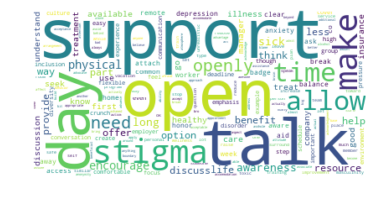

In [23]:
# Pulling out the list of parsed words and put them into a wordcloud
list_of_words = slcv.vocabulary_.keys()
list_of_words = list(list_of_words)
list_of_words.sort()

wordcloud = WordCloud(background_color="white").generate(" ".join(list_of_words))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

### Q2 - Factors that affect comfort level in discussing MH at workplace
------

In [24]:
def make_dummies_q(question,num,drop_pattern = 1):
    '''
    This function creates dummy variable for text responses.
    It also creates a table of answers that are omitted in the table in preparation for analysis,
        since n-1 answer for each question is needed to avoid multicollinearity.
        
    Returns:
    -------
    question_omitted: a table with question and the answer that has been omitted to avoid multicollinearity.
    result: a table of dummy variables.
    '''
    d = {}
    question_omitted = pd.DataFrame(columns = ["Question","Answer"])
    result = pd.DataFrame()

    d[num] = pd.get_dummies(df_2.loc[:,question])
    if drop_pattern == 1:
        question_omitted = question_omitted.append({"Question":question, "Answer": d[num].columns[-2]},ignore_index = True)
        d[num].drop(columns = d[num].columns[0],inplace = True)
    elif drop_pattern == 2:
        question_omitted = question_omitted.append({"Question":question, "Answer": d[num].columns[3]},ignore_index = True)
        d[num].drop(columns = d[num].columns[3],inplace = True)

    for i in range(len(d[num].columns)):
        name = question + "__" + d[num].columns[i]
        d[num].rename(columns = {d[num].columns[i] : name},inplace=True)

    result = pd.concat([result,d[num]],axis=1)
        
    return question_omitted,result

In [25]:
# grabbing the dependent variables
dependent_class = pd.read_csv("saved_csv/q1_dependent_alt.csv")
dependent_class.drop('Unnamed: 0',axis=1,inplace=True)

In [26]:
# What is your gender?
question_omitted,gender = make_dummies_q(df_2.columns[-7],-7,drop_pattern = 2)

In [27]:
# Grouping countries into 5 continents
country_names = df_2.iloc[:,-6].groupby(df_2.iloc[:,-6]).count().index

df_2["countries_continent"] = df_2.iloc[:,-6]

north_am = [8,34,55]
south_am = [0,6,9,56]
asia = [3,20,23,24,26,28,29,39,43,44,46]
africa = [14,30,33,37,48]
europe = [2,4,5,7,10,11,13,15,16,17,18,19,21,22,25,27,31,32,35,38,40,41,42,45,47,49,50,51,52,53,54]
oceania = [1,36]
did_not_answer = [12]

continents = [north_am,south_am,asia,africa,europe,oceania,did_not_answer]
names = ["North America", "South America", "Asia", "Africa", "Europe", "Oceania", "Did not answer"]

for position,continent in enumerate(continents):
    for num in np.flip(continent):
        df_2.loc[:,"countries_continent"][df_2.loc[:,"countries_continent"]== country_names[num]]=names[position]
        
countries = df_2.iloc[:,-1]

countries = pd.get_dummies(countries)
countries.drop(columns = "North America", inplace=True)

In [28]:
# What is your race?
races = pd.get_dummies(df_2.iloc[:,-5])
races.drop(columns = "Caucasian", inplace=True)

In [29]:
# company_size
company_size = pd.get_dummies(df_2.iloc[:,2])
company_size.drop(columns="0",inplace=True)
size = company_size.iloc[:,[3,5]]

In [30]:
# Creating a table of demographics
demographics = pd.concat([gender,countries,races,df_2.iloc[:,[-9,1,3,4]],size],axis=1)

In [31]:
# creating features/independent variables
independent_q1_alt = pd.concat([independent_q1,demographics],axis=1)

In [33]:
# p-value WITH DEMOGRAPHICS

X_1 = independent_q1_alt
Y_1 = dependent_class_alt

scaler = preprocessing.StandardScaler()
scaler.fit(X_1)
X_transformed_1 = scaler.transform(X_1)

X_transformed_1 = np.hstack([np.ones([X_transformed_1.shape[0],1]), X_transformed_1])

logit = sm.Logit(Y_1, X_transformed_1)
fitted_model_demo = logit.fit_regularized()
fitted_model_demo.summary()

# alpha = 0.05
# all features together are significant
# Columns that are significant: 3,4,5,20,21,22,33,39,46,47,51

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.511112099495514
            Iterations: 96
            Function evaluations: 97
            Gradient evaluations: 96


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Classes   No. Observations:                 1173
Model:                          Logit   Df Residuals:                     1120
Method:                           MLE   Df Model:                           52
Date:                Thu, 21 Mar 2019   Pseudo R-squ.:                  0.2593
Time:                        20:37:27   Log-Likelihood:                -599.53
converged:                       True   LL-Null:                       -809.37
                                        LLR p-value:                 6.030e-59
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0962    436.744     -0.000      1.000    -856.098     855.906
x1             0.1001      0.090      1.113      0.266      -0.076       0.276
x2             0.0179      0.087      0.205      0.837      -0.153       0.188
x3            -0.0047      0.090     -0.053      0.958      -0.181       0.172
x4             0.1851      0.076      2.436      0.015       0.036       0.334
x5             0.2505      0.082      3.037      0.002       0.089       0.412
x6             0.2713      0.084      3.215      0.001       0.106       0.437
x7            -0.0548      0.076     -0.720      0.472      -0.204       0.095
x8             0.0558      0.103      0.543      0.587      -0.146       0.257
x9             0.0765      0.085      0.900      0.368      -0.090       0.243
x10            0.0178      0.090      0.197      0.844      -0.159       0.195
x11            0.0627      0.073      0.861      0.389      -0.080       0.205
x12           -0.0190      0.072     -0.263      0.792      -0.160       0.122
x13           -0.0062      0.075     -0.082      0.934      -0.154       0.142
x14           -0.0959      0.076     -1.256      0.209      -0.246       0.054
x15           -0.0441      0.073     -0.606      0.544      -0.187       0.098
x16            0.0734      0.077      0.957      0.339      -0.077       0.224
x17            0.1380      0.076      1.811      0.070      -0.011       0.287
x18            0.0681      0.072      0.942      0.346      -0.074       0.210
x19            1.1608    209.425      0.006      0.996    -409.305     411.626
x20           -0.0155      0.077     -0.200      0.841      -0.167       0.136
x21            0.3603      0.098      3.679      0.000       0.168       0.552
x22            0.4822      0.084      5.716      0.000       0.317       0.648
x23            0.2797      0.085      3.287      0.001       0.113       0.446
x24            0.0100      0.080      0.124      0.901      -0.147       0.167
x25           -0.0266      0.081     -0.331      0.741      -0.184       0.131
x26            0.1029      0.078      1.321      0.187      -0.050       0.256
x27           -0.0176      0.071     -0.247      0.805      -0.157       0.122
x28           -0.0781      0.080     -0.977      0.329      -0.235       0.079
x29           -0.0226      0.072     -0.314      0.753      -0.163       0.118
x30           -0.0042      0.078     -0.054      0.957      -0.157       0.149
x31           -0.0413      0.104     -0.396      0.692      -0.246       0.163
x32            0.6939   1.48e+04   4.69e-05      1.000    -2.9e+04     2.9e+04
x33            0.2260      0.152      1.489      0.136      -0.071       0.523
x34            0.2493      0.093      2.677      0.007       0.067       0.432
x35            0.1509      0.082      1.837      0.066      -0.010       0.312
x36           -0.0408      0.068     -0.596      0.551      -0.175       0.093
x37            0.5103    202.055      0.003      0.998    -395.510     396.530
x3

In [34]:
# Creating a model using the questions that are statistically significant
ind_q1 = independent_q1_alt.copy()
ind_q1.columns = [np.arange(len(ind_q1.columns))]

X_train, X_test, y_train, y_test = train_test_split(ind_q1,dependent_class_alt,test_size = 0.2)

estimators = [("normalize", preprocessing.StandardScaler()),
             ("model",LogisticRegression())]

pipe = pipeline.Pipeline(estimators)

param_grid = [{"model":[XGBClassifier()], 
               "normalize": [preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), None],
               "model__max_depth":[1,2,3,4,5],"model__n_estimators":[50,100,150,200],"model__n_jobs":[6]},
              {"model": [RandomForestClassifier()],
               "normalize": [preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), None],
               "model__n_estimators":[100,150,200],"model__n_jobs":[6]}]

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=6)
fitted_grid_1 = grid.fit(X_train,y_train)

In [35]:
fitted_grid_1.best_estimator_

Pipeline(memory=None,
     steps=[('normalize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
...n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [36]:
fitted_grid_1.best_score_

0.720682302771855

In [37]:
fitted_grid_1.score(X_test,y_test)

0.7276595744680852

In [38]:
# Ranking of factors that are important for predicting comfort level, from most to least important
indices = np.flip(fitted_grid_1.best_estimator_.named_steps["model"].feature_importances_.argsort())
sig_list = [3,4,5,20,21,22,33,39,46,47,51]

numbers = []
for position,idx in enumerate(indices):
    for num in sig_list:
        if idx == num:
            numbers.append(idx)

independent_q1_alt.columns[numbers]

Index(['What is your age?',
       'How willing would you be to share with friends and family that you have a mental illness?',
       'Overall, how much importance does your employer place on mental health?',
       'Have you ever sought treatment for a mental health disorder from a mental health professional?',
       'Are you self-employed?', 'More than 1000',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?__Very easy',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?__Somewhat easy',
       'Did not answer',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?__Neither easy nor difficult',
       'Oceania'],
      dtype='object')

### What can companies to do encourage their employees to seek treatment?
------

In [45]:
# set up 2 dataframes for concatenating data
omitted = pd.DataFrame(columns = ["Question","Answer"])
final = pd.DataFrame()

# current_mh_coverage
for i in [0,2,3]:
    result = make_dummies(current_mh_coverage[i],-1)
    final = pd.concat([final,result],axis = 1)

for i in [2,-2,-1]:
    result = make_dummies(current_mh_coverage[5],i)
    final = pd.concat([final,result],axis = 1)

In [46]:
ind_variable = pd.concat([final,demographics],axis=1)

In [47]:
dep_question = "Have you ever sought treatment for a mental health disorder from a mental health professional?"

X_1 = ind_variable
Y_1 = df_2.loc[:,dep_question]

scaler = preprocessing.StandardScaler()
scaler.fit(X_1)
X_transformed_1 = scaler.transform(X_1)

X_transformed_1 = np.hstack([np.ones([X_transformed_1.shape[0],1]), X_transformed_1])

logit = sm.Logit(Y_1, X_transformed_1)
fitted_model_sp = logit.fit_regularized()
fitted_model_sp.summary()

# alpha = 0.05
# all features together are significant
# Columns that are significant: 0,5,6,7,8,12

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5996292618331996
            Iterations: 79
            Function evaluations: 80
            Gradient evaluations: 79


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                 Logit Regression Results                                                                 
==========================================================================================================================================================
Dep. Variable:     Have you ever sought treatment for a mental health disorder from a mental health professional?   No. Observations:                 1173
Model:                                                                                                      Logit   Df Residuals:                     1138
Method:                                                                                                       MLE   Df Model:                           34
Date:                                                                                            Thu, 21 Mar 2019   Pseudo R-squ.:                  0.1016
Time:                                                                                                    20:42:03   Log-Likelihood:                -703.37
converged:                                                                                                   True   LL-Null:                       -782.87
                                                                                                                    LLR p-value:                 4.507e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5506     80.305      0.007      0.995    -156.844     157.945
x1             0.2608      0.082      3.193      0.001       0.101       0.421
x2             0.0862      0.084      1.031      0.303      -0.078       0.250
x3             0.0393      0.087      0.451      0.652      -0.131       0.210
x4             0.0831      0.072      1.150      0.250      -0.059       0.225
x5            -0.0320      0.076     -0.420      0.675      -0.182       0.118
x6            -0.1337      0.076     -1.764      0.078      -0.282       0.015
x7             0.1436      0.079      1.812      0.070      -0.012       0.299
x8             0.3204      0.071      4.524      0.000       0.182       0.459
x9             0.1871      0.077      2.425      0.015       0.036       0.338
x10           -0.0411      0.064     -0.644      0.520      -0.166       0.084
x11            1.2438    236.592      0.005      0.996    -462.468     464.955
x12           -0.0404      0.067     -0.605      0.545      -0.171       0.090
x13           -0.2358      0.085     -2.778      0.005      -0.402      -0.069
x14            0.4462    130.994      0.003      0.997    -256.297     257.189
x15           -0.1053      0.122     -0.861      0.389      -0.345       0.135
x16            0.0567      0.071      0.796      0.426      -0.083       0.197
x17           -0.0697      0.069     -1.005      0.315      -0.206       0.066
x18            0.0502      0.078      0.646      0.519      -0.102       0.202
x19           -0.4976    165.473     -0.003      0.998    -324.819     323.823
x20           -0.1012      0.062     -1.625      0.104      -0.223       0.021
x21           -0.7745    259.312     -0.003      0.998    -509.017     507.468
x22           -0.2032      0.132     -1.537      0.124      -0.462       0.056
x23            0.1341      0.098      1.365      0.172      -0.059       0.327
x24           -0.5507    250.052     -0.002      0.998    -490.643     489.542
x25           -0.0329      0.059     -0.559      0.576      -0.148       0.082
x26            0.4916    201.953      0.002      0.998    -395.329     396.312
x27            0.1290      0.080      1.615      0.106      -0.028       0.285
x28           -0.7243   2634.064     -0.000      1.000   -5163.395    5161.946
x29            0.0280      0.

In [48]:
# Creating a model using the questions that are statistically significant
ind_alt = ind_variable.copy()
ind_alt.columns = [np.arange(len(ind_alt.columns))]

X_train, X_test, y_train, y_test = train_test_split(ind_alt,df_2.loc[:,dep_question],test_size = 0.2)

estimators = [("normalize", preprocessing.StandardScaler()),
             ("model",LogisticRegression())]

pipe = pipeline.Pipeline(estimators)

param_grid = [{"model":[XGBClassifier()], 
               "normalize": [preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), None],
               "model__max_depth":[1,2,3,4,5],"model__n_estimators":[50,100,150,200],"model__n_jobs":[6]},
              {"model": [RandomForestClassifier()],
               "normalize": [preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), None],
               "model__n_estimators":[100,150,200],"model__n_jobs":[6]}]

grid = GridSearchCV(pipe, param_grid, cv=5)
fitted_grid_2 = grid.fit(X_train,y_train)

In [49]:
fitted_grid_2.best_estimator_

Pipeline(memory=None,
     steps=[('normalize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=6, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [50]:
fitted_grid_2.best_score_

0.6417910447761194

In [51]:
fitted_grid_2.score(X_test,y_test)

0.6595744680851063

In [52]:
# Ranking of factors that are important for predicting comfort level, from most to least important
indices = np.flip(fitted_grid_2.best_estimator_.named_steps["model"].feature_importances_.argsort())
sig_list = [0,5,6,7,8,12]

numbers = []
for position,idx in enumerate(indices):
    for num in sig_list:
        if idx == num:
            numbers.append(idx)

ind_variable.columns[numbers]

Index(['What is your gender?__Female',
       'Does your employer provide mental health benefits as part of healthcare coverage?__Yes',
       'Asia', 'What is your gender?__Genderqueer',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?__Very easy',
       'What is your gender?__Did not answer'],
      dtype='object')

------
### Please continue to Capstone modelling stage v.3-RNN for the remainder of the project.
------